***FIFA World Cup ***

The Fédération Internationale de Football Associationis an association which describes itself as an international governing body of association football, futsal, and beach soccer. FIFA is responsible for the organization of football's major international tournaments, notably the World Cup which commenced in 1930.

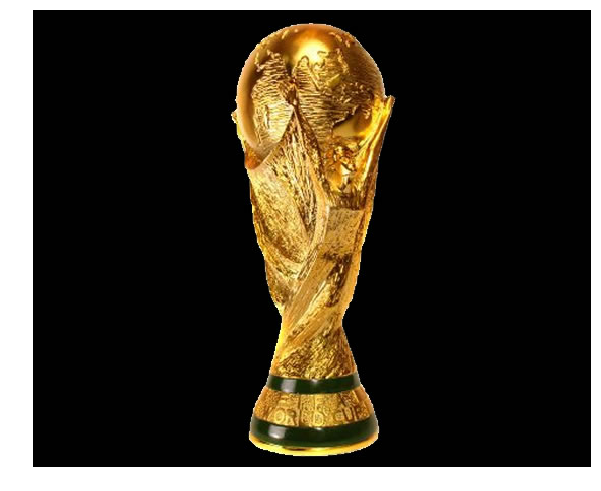

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

plt.figure(figsize=(10,10))
mask = np.array(Image.open('../input/trophyplayercoach/Trophy.jpg'))
plt.imshow(mask)
plt.axis('off')
plt.show()


**Importing libraries**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['fifa-world-cup', 'trophyplayercoach']


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Read  data**

In [4]:
# Read the data
# ---------------------------------------------------------------------------------
world_cups = pd.read_csv("../input/fifa-world-cup/WorldCups.csv")
world_cup_player = pd.read_csv("../input/fifa-world-cup/WorldCupPlayers.csv")
world_cup_matches = pd.read_csv("../input/fifa-world-cup/WorldCupMatches.csv")

**Champions of the World Cup**

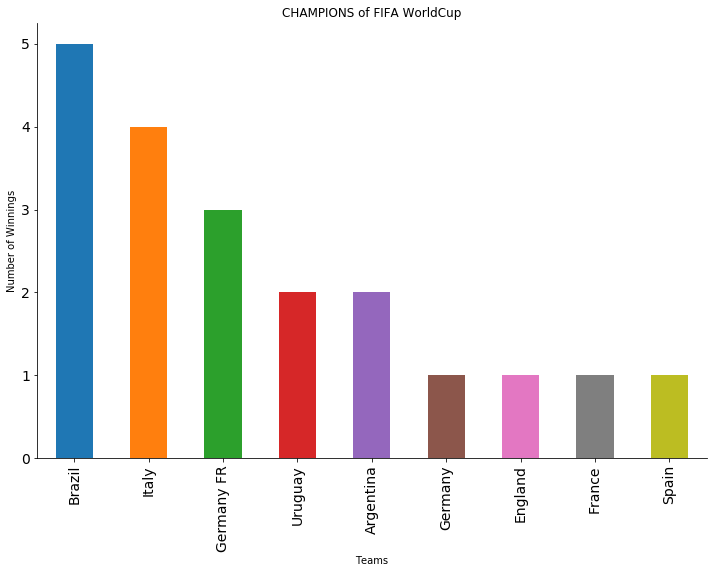

In [5]:
# Champions of World Cup
# ---------------------------------------------------------------------------------
winner = world_cups['Winner'].value_counts()

winner.plot(kind='bar', title="CHAMPIONS of FIFA WorldCup", fontsize=14,figsize=(12,8))
plt.xlabel('Teams')
plt.ylabel('Number of Winnings')
sns.despine(top=True, right=True)
plt.show()

**All Postions of teams in World Cup**

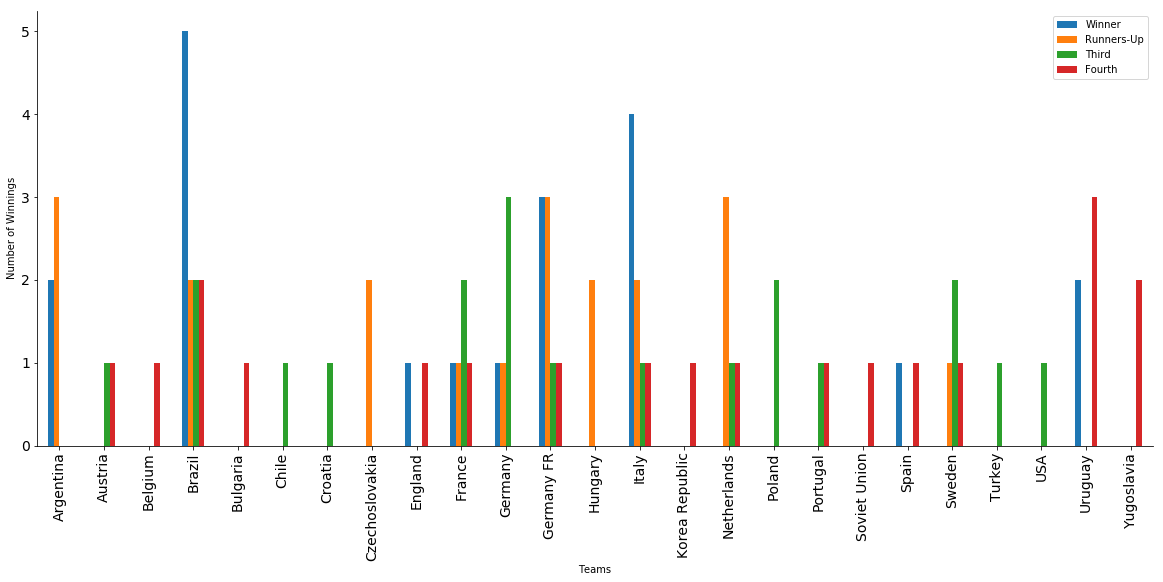

In [6]:
# AllPositions of World Cup
# ---------------------------------------------------------------------------------
all_pos = world_cups[['Winner', 'Runners-Up', 'Third', 'Fourth']]
all_positions = all_pos.apply(pd.value_counts).fillna(0).astype(int)

all_positions.plot(y=['Winner', 'Runners-Up', 'Third', 'Fourth'], kind='bar', fontsize=14, figsize=(20,8))
plt.xlabel('Teams')
plt.ylabel('Number of Winnings')
sns.despine(top=True, right=True)
plt.show()


**Goal Scored in 1930 to 2014**

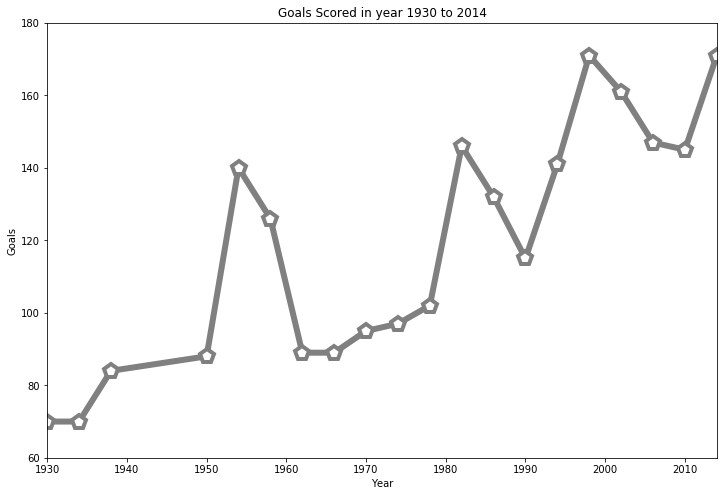

In [7]:
# Goal Scored in year 1930 to 2014
# --------------------------------------------------------------------------------
goal = world_cups[['Year', 'GoalsScored']]

plt.figure(figsize=(12,8))
plt.plot(goal['Year'], goal['GoalsScored'], '-p', color='gray',
         markersize=15, linewidth=6,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=4)
plt.xlim(1930, 2014)
plt.ylim(60, 180)
plt.title('Goals Scored in year 1930 to 2014')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.show()

**Crowd in WorldCup from 1930 to 2014**

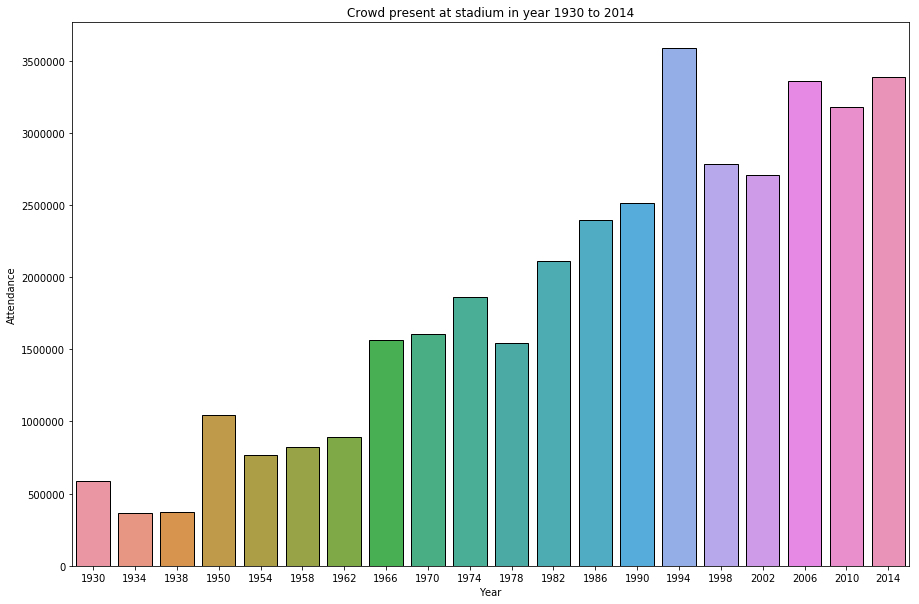

In [8]:
# Attendance of the crowd in WorldCup from 1930 to 2014
# -------------------------------------------------------------------------------
world_cups['Attendance'] = world_cups['Attendance'].apply(lambda x: x.replace('.', '',))
crowd = world_cups[['Year', 'Attendance']]

plt.figure(figsize=(15,10))
sns.barplot(crowd['Year'].astype(int), crowd['Attendance'].astype(int), linewidth=1, edgecolor="k"*len(crowd))
plt.title("Crowd present at stadium in year 1930 to 2014")
plt.show()

**Average attendance of the crowd in WorldCup Matches**

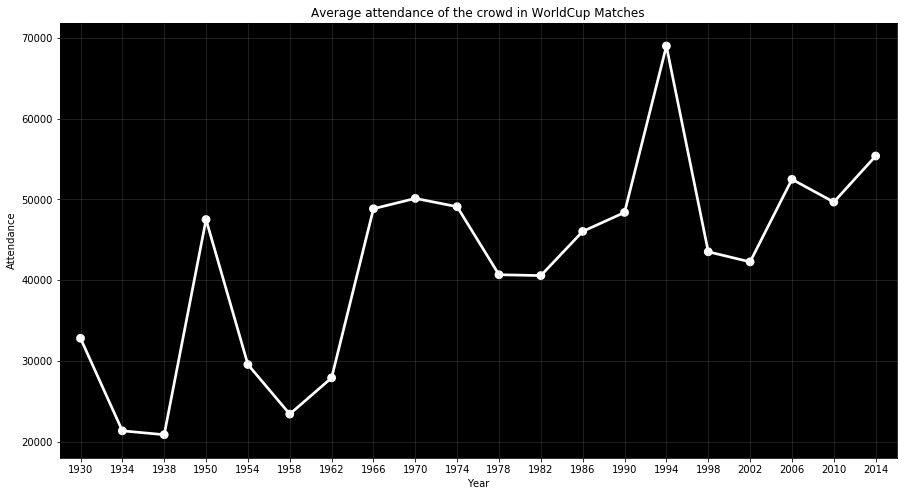

In [9]:
# Average attendance of the crowd in WorldCup Matches from 1930 to 2014
# -----------------------------------------------------------------------------
avg_att = world_cup_matches.groupby('Year')['Attendance'].mean().reset_index().head(20)

plt.figure(figsize=(15,8))
at = sns.pointplot(avg_att["Year"].astype(int), avg_att["Attendance"].astype(int), color="w")
at.set_facecolor("k")
plt.grid(True, color="grey", alpha=.3)
plt.title("Average attendance of the crowd in WorldCup Matches")
plt.show()

**Half time goals**

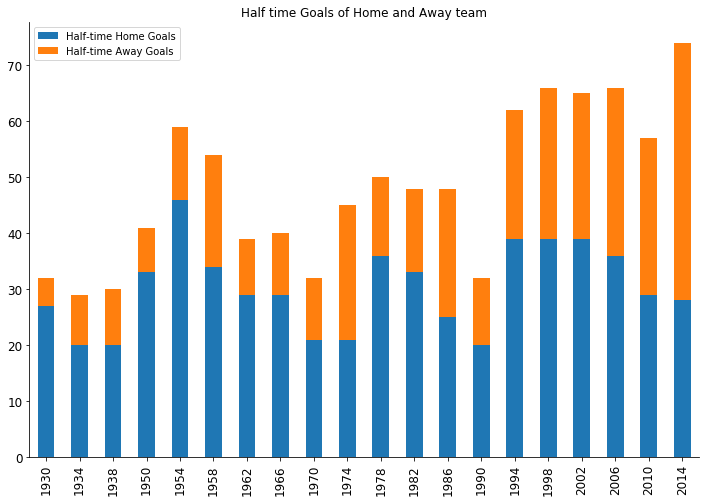

In [10]:
# Half time goals of home and away team
# -----------------------------------------------------------------------------
half_time = world_cup_matches.groupby('Year')['Half-time Home Goals', 'Half-time Away Goals'].sum().reset_index().head(20).astype(int)

half_time[['Half-time Home Goals', 'Half-time Away Goals']].plot(kind='bar', stacked=True,figsize=(12,8),fontsize=12)
r = range(0, 20)
plt.xticks(r, half_time['Year'])
plt.title("Half time Goals of Home and Away team")
sns.despine(top=True, right=True)
plt.show()

**Home team Goals**

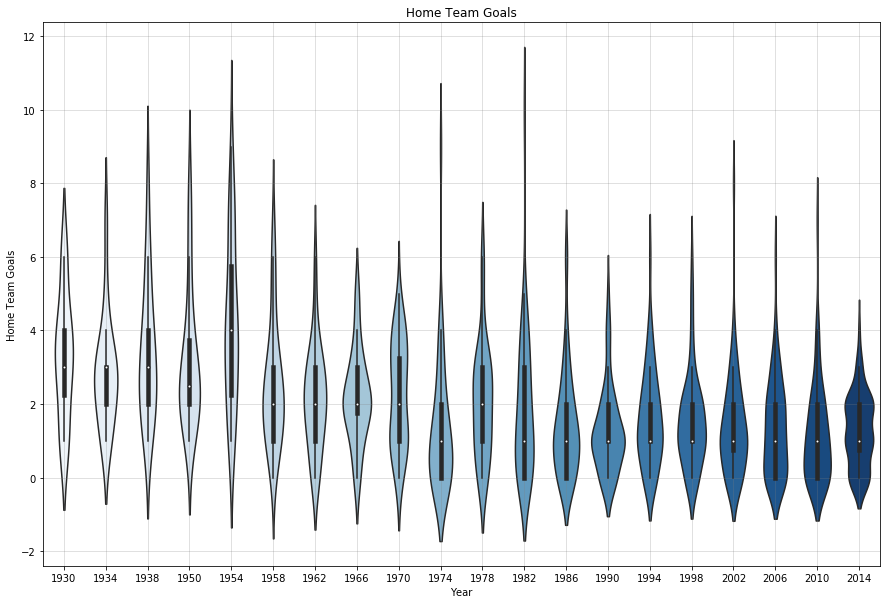

In [11]:
# Home team Goals
# ----------------------------------------------------------------------------
home_team = world_cup_matches[['Year', 'Home Team Goals']].head(840).astype(int)

plt.figure(figsize=(15,10))
sns.violinplot(x=home_team['Year'], y=home_team['Home Team Goals'], palette='Blues')
plt.grid(True, color="grey", alpha=.3)
plt.title("Home Team Goals")
plt.show()

**Away team Goals**

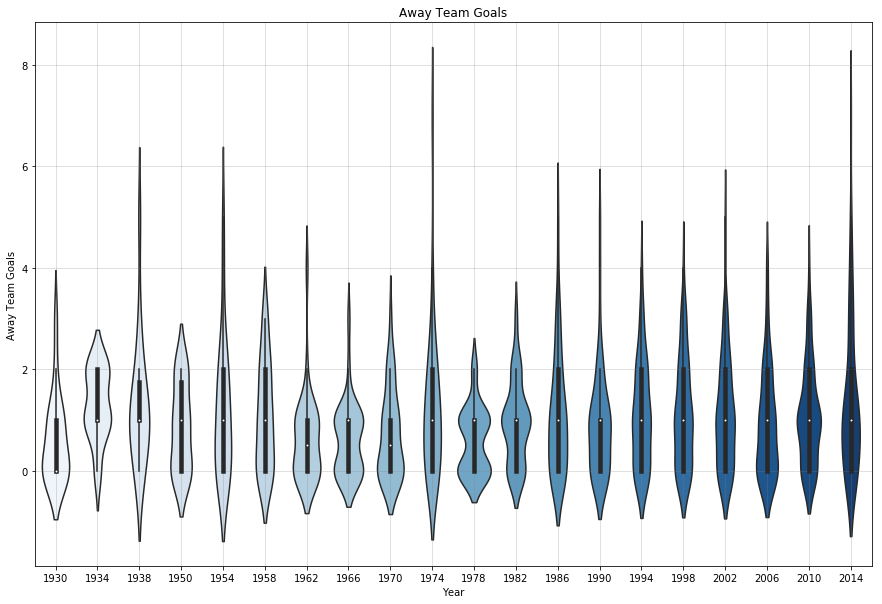

In [12]:
# Away team Goals
# ----------------------------------------------------------------------------
home_team = world_cup_matches[['Year', 'Away Team Goals']].head(840).astype(int)

plt.figure(figsize=(15,10))
sns.violinplot(x=home_team['Year'], y=home_team['Away Team Goals'], palette='Blues')
plt.grid(True, color="grey", alpha=.3)
plt.title("Away Team Goals")
plt.show()

**Player Names**

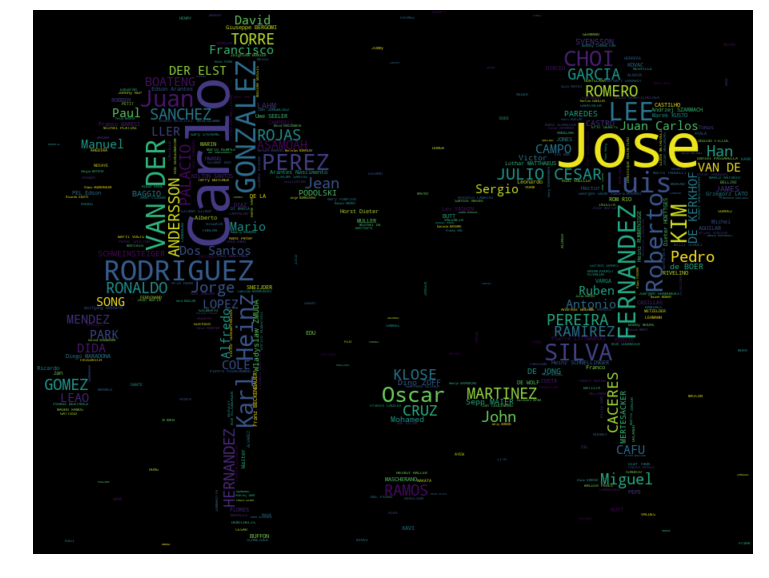

In [13]:
plt.figure(figsize=(15,10))
name = np.array(Image.open('../input/trophyplayercoach/player.jpg'))
wordcloud = WordCloud(mask=name,max_words=5000).generate(' '.join(world_cup_player['Player Name']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()



**Coach Names**

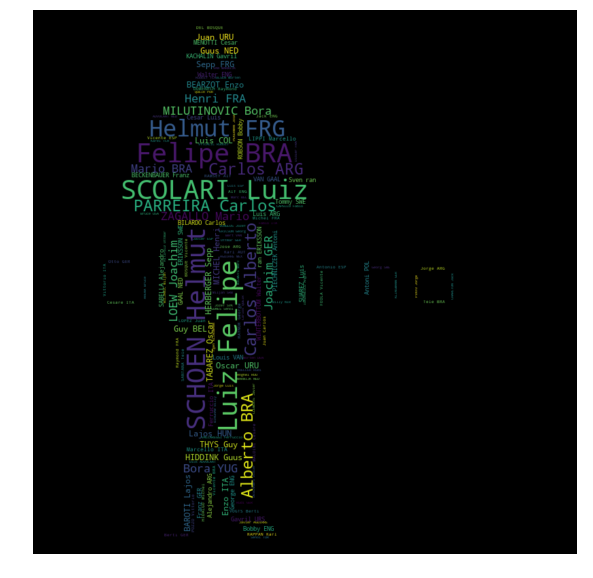

In [14]:
plt.figure(figsize=(15,10))
name = np.array(Image.open('../input/trophyplayercoach/coach.jpg'))
wordcloud = WordCloud(mask=name,max_words=5000).generate(' '.join(world_cup_player['Coach Name']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**HOME TEAM NAMES**

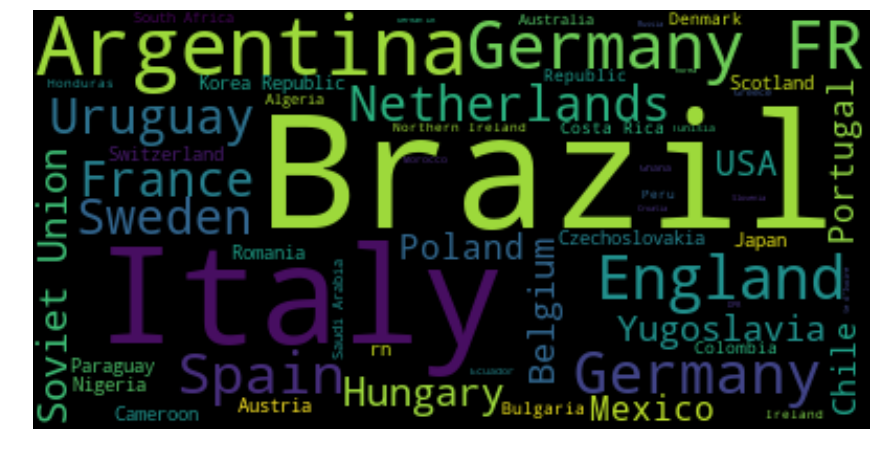

In [15]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud( ).generate(' '.join(world_cup_matches['Home Team Name'].head(840)))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**AWAY TEAM NAME**

In [ ]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud( ).generate(' '.join(world_cup_matches['Away Team Name'].head(840)))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()